In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
from collections import Counter
import re
import nltk

In [97]:
#pip install nltk


In [98]:
df = pd.read_csv('spam.csv',usecols=['v1','v2'] , encoding='ISO-8859-1')
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [99]:
df.head()



,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
df.isnull().sum()



v1    0
v2    0
dtype: int64

In [101]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [102]:
df.rename({'v1':'Class','v2':'Message'},axis=1,inplace=True)
df

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [103]:
df["Class"] = df["Class"].replace({"spam": 0, 'ham': 1})
df

,Class,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [104]:
df.duplicated().sum()

403

In [105]:
##Remove Duplicates
df = df.drop_duplicates(keep='first')
df

,Class,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


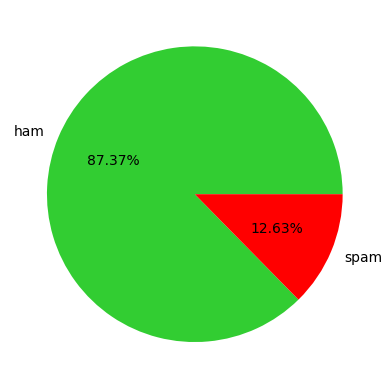

In [106]:
colors = ['limegreen', 'red']
plt.pie(df['Class'].value_counts(),labels=['ham','spam'],autopct='%0.2f%%',colors=colors)
plt.show()

In [107]:
df['Class'].value_counts()

Class
1    4516
0     653
Name: count, dtype: int64

In [108]:
# Assuming 'text_column' is the column containing the text data in your DataFrame
text_data = df['Message']

# Step 1: Convert to lowercase
text_data = text_data.apply(lambda x: x.lower())
text_data


0       go until jurong point, crazy.. available only ...
1                           ok lar... joking wif u oni...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor... u c already then say...
4       nah i don't think he goes to usf, he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will ì_ b going to esplanade fr home?
5569    pity, * was in mood for that. so...any other s...
5570    the guy did some bitching but i acted like i'd...
5571                           rofl. its true to its name
Name: Message, Length: 5169, dtype: object

In [109]:

#nltk.download('punkt')
#nltk.download('stopwords')

In [110]:
# Step 2: Tokenization
text_data = text_data.apply(lambda x: word_tokenize(x))
text_data


0       [go, until, jurong, point, ,, crazy, .., avail...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, ..., u, c, alrea...
4       [nah, i, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568     [will, ì_, b, going, to, esplanade, fr, home, ?]
5569    [pity, ,, *, was, in, mood, for, that, ., so, ...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                  [rofl, ., its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [111]:
# Step 3: Removing Special Characters-alpha numerics
text_data = text_data.apply(lambda x: [word for word in x if word.isalnum()])
text_data

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, think, he, goes, to, usf, he, liv...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [112]:
#Removing Special Characters
text_data = text_data.apply(lambda x: [re.sub(r'[^a-zA-Z\s]', '', word) for word in x])
text_data

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, , a, wkly, comp, to, win, fa...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, think, he, goes, to, usf, he, liv...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, , c...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Message, Length: 5169, dtype: object

In [113]:
# Step 4: Removing Stopwords and Punctuation
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])
print(stop_words)
print(text_data)


{'couldn', 'other', 'd', "you've", 'out', 'the', 'an', 'm', 'having', 'down', 'shouldn', 'those', 'a', 'up', 'll', 'against', "mightn't", 'aren', 'my', 'why', 'i', 'can', 'ain', "wasn't", "aren't", 'herself', 'some', 'during', 'only', 'be', 'above', 'been', 'yourself', 'their', 'our', 'mightn', 'this', "that'll", 'hasn', 'which', 're', 'for', 'yourselves', 'that', 'themselves', 'your', 'between', 'here', 'very', 'how', 'if', 'into', 'we', 'from', 'of', 'too', 'myself', 'what', 'itself', 'it', 'do', 'further', 'than', "it's", 'any', "should've", "wouldn't", 'more', 'should', "she's", 'ma', 'just', 'had', 'hadn', 'was', 'has', "won't", 'to', "mustn't", 'wouldn', 'not', 'on', 'ours', 'before', 'all', 'through', 'such', 'when', 'does', "you'll", 'haven', 'there', 'him', 'after', 'don', "hasn't", 'have', 'most', 'few', 'now', 'under', "couldn't", 'you', 'me', "shan't", 'once', "you'd", 'did', 'both', 'himself', 'nor', 'each', 'being', 'who', 'or', 'didn', 'its', 'theirs', "haven't", 'with',

In [114]:
# Step 5: Stemming
stemmer = PorterStemmer()
text_data = text_data.apply(lambda x: [stemmer.stem(word) for word in x])
text_data


0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, wkli, comp, win, fa, cup, final,...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4            [nah, think, goe, usf, live, around, though]
                              ...                        
5567    [nd, time, tri, contact, u, pound, prize, clai...
5568                          [b, go, esplanad, fr, home]
5569                                [piti, mood, suggest]
5570    [guy, bitch, act, like, interest, buy, someth,...
5571                                   [rofl, true, name]
Name: Message, Length: 5169, dtype: object

In [115]:

#joining the lists of tokens back into sentences
text_data = text_data.apply(lambda x: ' '.join(x))
text_data



0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u pound prize claim easi c...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5169, dtype: object

In [116]:

df['Text'] = text_data
df

C:\Users\ai_ssr\AppData\Local\Temp\ipykernel_9620\2630338529.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = text_data


,Class,Message,Text
0,1,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,1,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,1,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...,nd time tri contact u pound prize claim easi c...
5568,1,Will Ì_ b going to esplanade fr home?,b go esplanad fr home
5569,1,"Pity, * was in mood for that. So...any other s...",piti mood suggest
5570,1,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [117]:

wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


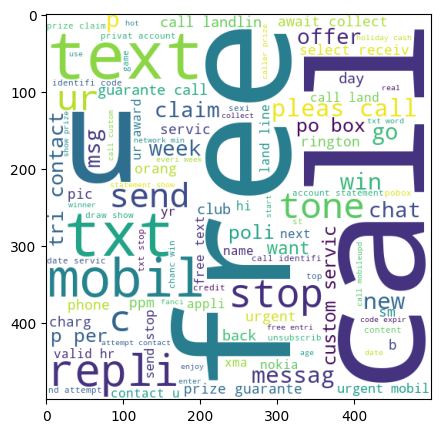

In [118]:
## Spam Word Cloud
spam_wc = wc.generate(df[df['Class'] == 0]['Text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam_wc)
plt.show()


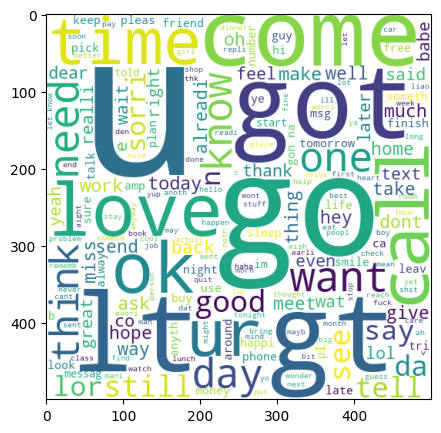

In [119]:
## Ham Word Cloud
ham_wc = wc.generate(df[df['Class'] == 1]['Text'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham_wc)
plt.show()

In [120]:
# Converting Ham Messages to List of Words
x = df[df['Class'] == 1]['Text'].str.cat(sep= " ")
ham_word_list = x.split()
ham_word_list

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'that',
 'way',
 'u',
 'fe

In [121]:

ham_top_10 = pd.DataFrame(Counter(ham_word_list).most_common(10))
ham_top_10

,0,1
0,u,889
1,go,406
2,get,351
3,gt,288
4,lt,287
5,come,275
6,got,237
7,know,236
8,like,234
9,call,233


In [122]:
# Converting spam Messages to List of Words
y = df[df['Class'] == 0]['Text'].str.cat(sep= " ")
spam_word_list = y.split()
spam_word_list

['free',
 'entri',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 'st',
 'may',
 'text',
 'fa',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 'freemsg',
 'hey',
 'darl',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl',
 'valid',
 'hour',
 'mobil',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 'six',
 'chanc',
 'win',
 'cash',
 'pound',
 'txt',
 'csh',
 'send',
 'cost',
 'day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 'info',
 'urgent',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 'c',
 'lccltd',
 'pobox',
 'ldnwarw',
 'xxxmobilemovieclub',
 'use',
 'credit',
 'click',
 'wap',
 'link',
 'next',
 'txt',
 'messag',
 'click',
 'h

In [123]:
spam_top_10 = pd.DataFrame(Counter(spam_word_list).most_common(10))
spam_top_10

,0,1
0,call,322
1,free,192
2,txt,141
3,u,126
4,text,123
5,ur,119
6,mobil,115
7,stop,106
8,repli,104
9,claim,98


In [124]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=0)

In [125]:
### Naive Bayes classifier

In [126]:
# Vectorize the text data using a simple bag-of-words approach
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [127]:
# Train a simple Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)


MultinomialNB()

In [128]:
# Make predictions on the test set
predictions = classifier.predict(X_test_vectorized)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [129]:
# Evaluate the model
training_score = classifier.score(X_train_vectorized, y_train)
testing_score = classifier.score(X_test_vectorized, y_test)

print(f'Training Score: {training_score:.2f}')
print(f'Testing Score: {testing_score:.2f}')

Training Score: 0.99
Testing Score: 0.98


In [130]:
# Display classification report
print('\nClassification Report:\n', classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       149
           1       0.98      1.00      0.99       885

    accuracy                           0.98      1034
   macro avg       0.98      0.95      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [131]:
# Display actual and predicted values for all columns
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions, 'Text': X_test})
result_df


,Actual,Predicted,Text
1851,1,1,dunno da next show aft toa payoh got
2375,1,1,thanx day u r goodmat think ur rite sari asusu...
2743,1,1,famili respond anyth room went home diwali one...
3324,1,1,nope juz work
3995,1,1,pay like lt gt yr difficult
...,...,...,...
2237,1,1,give someth drink take vomit temp might drop u...
4368,1,1,anytim lor
3046,1,1,much though h friday cant wait dunno wot hell ...
4263,1,1,broke list reason nobodi town ca tell sarcast ...


In [132]:
result_df[(result_df['Actual']==0) & (result_df['Predicted']==1) ]

,Actual,Predicted,Text
2773,0,1,come take littl time child afraid dark becom t...
1894,0,1,freemsg hey u got fone repli wild txt ill send...
1153,0,1,girl mani local u r virgin r readi fil ur ever...
3062,0,1,hi babe jordan r u im home abroad lone text ba...
2963,0,1,ever notic drive anyon go slower idiot everyon...
1136,0,1,dont forget place mani free request wish infor...
1171,0,1,got take take part wrc ralli oz u lucozad ener...
2821,0,1,romcapspam everyon around respond well presenc...
2429,0,1,guess first time creat web page read wrote wai...
190,0,1,uniqu enough find th august


In [133]:
result_df[(result_df['Actual']==1) & (result_df['Predicted']==0) ]

,Actual,Predicted,Text
4701,1,0,anytim
395,1,0,perform award calcul everi two current one mon...
386,1,0,custom place call
4700,1,0,like new mobil


In [134]:
### Deep Learning

In [135]:
import tensorflow
from keras.layers import Embedding,Dense,Activation
from keras.layers import LSTM, Bidirectional, BatchNormalization, Dropout
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [136]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [137]:
# train sequences
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)


In [138]:

vocab_size = len(tokenizer.word_counts) + 1
vocab_size

5293

In [139]:
# Max length for train
max_length = max([len(seq) for seq in train_seq])
max_length

73

In [140]:
X_train_final = pad_sequences(train_seq,maxlen=max_length,padding='post')
X_test_final = pad_sequences(test_seq,maxlen=max_length,padding='post')

X_train_final.shape,X_test_final.shape

((4135, 73), (1034, 73))

In [141]:
# Convert labels to keras categorical

y_train_final = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_final = np.asarray(y_test).astype('float32').reshape((-1,1))

y_train_final.shape,y_test_final.shape

((4135, 1), (1034, 1))

In [142]:
vector_size = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=vector_size,input_length=max_length))
model.add(Conv1D(32,2,activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 73, 100)           529300    
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 32)            6432      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 36, 32)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 32)            0         
                                                                 
 dense_3 (Dense)             (None, 36, 32)            1056      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                    

In [143]:
# Compile

model.compile(optimizer= Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_final,y_train_final,epochs=3,validation_data=(X_test_final,y_test_final))
history

Epoch 1/3
130/130 [==============================] - 2s 9ms/step - loss: 0.3964 - accuracy: 0.8781 - val_loss: 0.3568 - val_accuracy: 0.8559
Epoch 2/3
130/130 [==============================] - 1s 8ms/step - loss: 0.1498 - accuracy: 0.9424 - val_loss: 0.1116 - val_accuracy: 0.9700
Epoch 3/3
130/130 [==============================] - 1s 8ms/step - loss: 0.0387 - accuracy: 0.9889 - val_loss: 0.0999 - val_accuracy: 0.9778


In [144]:
# LSTM


In [145]:
vector_size = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=vector_size,input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 73, 100)           529300    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                34048     
 onal)                                                           
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 563669 (2.15 MB)
Trainable params: 563541 (2.15 MB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________
None


In [147]:
# Compile

model.compile(optimizer= Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_final,y_train_final,epochs=7,validation_data=(X_test_final,y_test_final))
history

Epoch 1/7
130/130 [==============================] - 6s 27ms/step - loss: 0.0049 - accuracy: 0.9990 - val_loss: 0.1232 - val_accuracy: 0.9632
Epoch 2/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0078 - accuracy: 0.9981 - val_loss: 5.3839 - val_accuracy: 0.1576
Epoch 3/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.2376 - val_accuracy: 0.9574
Epoch 4/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0082 - accuracy: 0.9961 - val_loss: 0.1715 - val_accuracy: 0.9758
Epoch 5/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.1495 - val_accuracy: 0.9787
Epoch 6/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.2136 - val_accuracy: 0.9652
Epoch 7/7
130/130 [==============================] - 3s 22ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.1244 - val_accuracy: 0.9758
